**Primer Parcial Sis420**

Arancibia Aguilar Daniel Andree

En este cuadernillo haré el procesado en PANDAS de los datasets que me tocaron

Dataset 1 = https://data.world/uci/adult

Dataset 2 = https://www.kaggle.com/datasets/boyangs444/process-data-for-predictive-maintenance?select=manual_30min_norm.csv

El primero según mi análisis corresponde a un modelo de regresión logística de clasificación binaria

El segundo corresponde a un modelo de regresión polinomial

In [359]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [406]:
#Se importan las librerías necesarias para los modelos
import os
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from matplotlib import pyplot
%matplotlib inline

# **DATASET 1 - Modelo Regresión Logística Clasificación Binaria**

Variables de entrada (X):

age
workclass
fnlwgt
education
education-num
marital-status
occupation
relationship
race
sex
capital-gain
capital-loss
hours-per-week
native-country

Variable de salida (Y):

annual income (Ingreso anual >50k, <=50k)

In [361]:
url = "/content/drive/MyDrive/SIS420/Primer Parcial SIS420/adult.data.csv"
dataframe = pd.read_csv(url)
print(dataframe)

       age          workclass  fnlwgt    education  education-num  \
0       39          State-gov   77516    Bachelors             13   
1       50   Self-emp-not-inc   83311    Bachelors             13   
2       38            Private  215646      HS-grad              9   
3       53            Private  234721         11th              7   
4       28            Private  338409    Bachelors             13   
...    ...                ...     ...          ...            ...   
32556   27            Private  257302   Assoc-acdm             12   
32557   40            Private  154374      HS-grad              9   
32558   58            Private  151910      HS-grad              9   
32559   22            Private  201490      HS-grad              9   
32560   52       Self-emp-inc  287927      HS-grad              9   

            marital-status          occupation    relationship    race  \
0            Never-married        Adm-clerical   Not-in-family   White   
1       Married-civ-spo

In [362]:
# Convertir las columnas de texto a números
dataframe['workclass'] = pd.factorize(dataframe['workclass'])[0]
dataframe['education'] = pd.factorize(dataframe['education'])[0]
dataframe['marital-status'] = pd.factorize(dataframe['marital-status'])[0]
dataframe['occupation'] = pd.factorize(dataframe['occupation'])[0]
dataframe['relationship'] = pd.factorize(dataframe['relationship'])[0]
dataframe['race'] = pd.factorize(dataframe['race'])[0]
dataframe['sex'] = pd.factorize(dataframe['sex'])[0]
dataframe['native-country'] = pd.factorize(dataframe['native-country'])[0]
dataframe['annual income'] = pd.factorize(dataframe['annual income'])[0]
print(dataframe)

       age  workclass  fnlwgt  education  education-num  marital-status  \
0       39          0   77516          0             13               0   
1       50          1   83311          0             13               1   
2       38          2  215646          1              9               2   
3       53          2  234721          2              7               1   
4       28          2  338409          0             13               1   
...    ...        ...     ...        ...            ...             ...   
32556   27          2  257302          6             12               1   
32557   40          2  154374          1              9               1   
32558   58          2  151910          1              9               6   
32559   22          2  201490          1              9               0   
32560   52          6  287927          1              9               1   

       occupation  relationship  race  sex  capital-gain  capital-loss  \
0               0        

In [363]:
#Se imprime la descripción de las columnas para buscar valores nulos
print(dataframe.describe())

                age     workclass        fnlwgt     education  education-num  \
count  32561.000000  32561.000000  3.256100e+04  32561.000000   32561.000000   
mean      38.581647      2.309972  1.897784e+05      3.424465      10.080679   
std       13.640433      1.225728  1.055500e+05      3.453582       2.572720   
min       17.000000      0.000000  1.228500e+04      0.000000       1.000000   
25%       28.000000      2.000000  1.178270e+05      1.000000       9.000000   
50%       37.000000      2.000000  1.783560e+05      2.000000      10.000000   
75%       48.000000      2.000000  2.370510e+05      5.000000      12.000000   
max       90.000000      8.000000  1.484705e+06     15.000000      16.000000   

       marital-status    occupation  relationship          race           sex  \
count    32561.000000  32561.000000  32561.000000  32561.000000  32561.000000   
mean         1.083781      4.666411      1.542397      0.221707      0.330795   
std          1.251381      3.386119 

**Ya que no se encontró valores nulos y se hizo la conversión de texto a números el dataset está listo para ser usado**

**Separo el dataset 80% para entrenamiento y 20% para test**

In [364]:
X = dataframe.drop(columns=['annual income'])
Y = dataframe['annual income']
print(X.shape)
print(y.shape)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
# Normalizar características solo en los conjuntos de entrenamiento y prueba
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

(32561, 14)
(32561,)


In [365]:
print(X_train_scaled.shape)
print(X_test_scaled.shape)

(26048, 14)
(6513, 14)


Agregar el término de intercepción (bias) a nuestras características escaladas

In [366]:
m_tr, n_tr = X_train_scaled.shape

X_trsccn = np.concatenate([np.ones((m_tr, 1)), X_train_scaled], axis=1)
print(X_trsccn.shape)

(26048, 15)


**Se define la funcion sigmoid**

In [367]:
def sigmoid(z):

    z = np.array(z)

    g = np.zeros(z.shape)

    g = 1 / (1 + np.exp(-z))

    return g

In [368]:
# Prueba la implementacion de la funcion sigmoid
z = [0, 0.5, 1]
g = sigmoid(z)

print('g(', z, ') = ', g)

g( [0, 0.5, 1] ) =  [0.5        0.62245933 0.73105858]


**Defino las funciones de costo y descenso por el gradiente**

In [369]:
def calcularCosto(theta, X, y):
    m = y.size
    J = 0
    h = sigmoid(X.dot(theta.T))
    J = (1 / m) * np.sum(-y.dot(np.log(h)) - (1 - y).dot(np.log(1 - h)))

    return J

In [370]:
def descensoGradiente(theta, X, y, alpha, num_iters):
    m = y.shape[0]
    theta = theta.copy()
    J_history = []
    for i in range(num_iters):
        h = sigmoid(X.dot(theta.T))
        theta = theta - (alpha / m) * (h - y).dot(X)

        J_history.append(calcularCosto(theta, X, y))
    return theta, J_history

**Hacemos el calculo de las thetas usando los valores de entrenamiento**

theta calculado por el descenso por el gradiente: [-1.09362692  0.36713441  0.08363005  0.01972694  0.01161893  0.5222469
 -0.03128525 -0.14217455 -0.13179347 -0.07951931 -0.32308529  0.4298474
  0.19718645  0.29142717 -0.01869753]


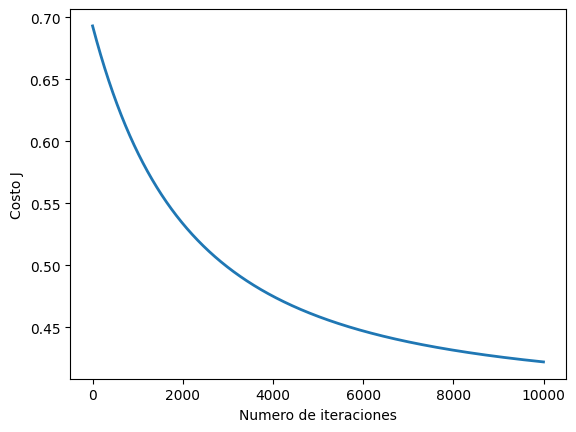

In [371]:
alpha = 0.001
num_iters = 10000

theta = np.zeros(X_trsccn.shape[1])
theta, J_history = descensoGradiente(theta, X_trsccn, Y_train, alpha, num_iters)

pyplot.plot(np.arange(len(J_history)), J_history, lw=2)
pyplot.xlabel('Numero de iteraciones')
pyplot.ylabel('Costo J')

print('theta calculado por el descenso por el gradiente: {:s}'.format(str(theta)))

**Creamos la funcion predict para hacer las predicciones**

In [372]:
def predict(theta, X_trsccn):
    m = X_trsccn.shape[0]
    p = np.zeros(m)
    p = np.round(sigmoid(X_trsccn.dot(theta.T)))
    return p


Hacemos la prediccion

In [373]:
p = predict(theta, X_trsccn)
print(p)

[0. 1. 0. ... 0. 0. 1.]


Comparando con las Y originales conseguimos un porcentaje de precisión 81.53 % en el entrenamiento

In [374]:
print('Precisión de entrenamiento: {:.2f} %'.format(np.mean(p == Y_train) * 100))

Precisión de entrenamiento: 81.53 %


**Ahora repetimos el proceso de concatenación para el test**

In [375]:
m_ts, n_ts = X_test_scaled.shape
# Agregar el término de intercepción a X_train_scaled
X_test_sccn = np.concatenate([np.ones((m_ts, 1)), X_test_scaled], axis=1)

In [376]:
p_test = predict(theta, X_test_sccn)
print(p_test)

[0. 0. 0. ... 1. 0. 0.]


Haciendo las comparaciones conseguimos un porcentaje de precisión de 81.68% en el test

In [405]:
print('Precisión de test: {:.2f} %'.format(np.mean(p_test == Y_test) * 100))

Precisión de test: 81.68 %


# **DATASET 2 - Modelo Regresión Polinómica**

Variables de entrada (X):

TIME
FM1
PE1
PE2
PE3
PE4
EPOCH

Variables de salida (Y):

TP1	(Temperatura en el tanque de pintura)


In [378]:
url = "/content/drive/MyDrive/SIS420/Primer Parcial SIS420/manual_30min_norm.csv"
dataframe1 = pd.read_csv(url)
print(dataframe1)

                    TIME   FM1   PE1   PE2   PE3   PE4   TP1         EPOCH
0       16/09/2013 00:00  1.00  0.54  0.54  0.12  0.12  0.14  1.379290e+09
1       16/09/2013 00:30  1.00  0.54  0.54  0.12  0.12  0.14  1.379291e+09
2       16/09/2013 01:00  1.00  0.54  0.54  0.12  0.12  0.14  1.379293e+09
3       16/09/2013 01:30  1.00  0.54  0.54  0.12  0.12  0.15  1.379295e+09
4       16/09/2013 02:00  1.00  0.54  0.54  0.12  0.12  0.15  1.379297e+09
...                  ...   ...   ...   ...   ...   ...   ...           ...
110636    7/1/2020 22:00  0.24  0.49  0.55  0.52  0.40  0.54  1.578434e+09
110637    7/1/2020 22:30  0.24  0.49  0.55  0.52  0.40  0.54  1.578436e+09
110638    7/1/2020 23:00  0.24  0.49  0.55  0.52  0.40  0.54  1.578438e+09
110639    7/1/2020 23:30  0.24  0.49  0.55  0.52  0.40  0.54  1.578440e+09
110640     8/1/2020 0:00  0.24  0.49  0.55  0.52  0.40  0.54  1.578442e+09

[110641 rows x 8 columns]


Modificamos la primera columna para volverla un valor numérico

In [379]:
# Convertir la columna 'TIME' a tipo datetime
dataframe1['TIME'] = pd.to_datetime(dataframe1['TIME'], format='%d/%m/%Y %H:%M')
# Calcular la diferencia en minutos desde un punto de referencia
referencia = dataframe1['TIME'].min()
dataframe1['TIME'] = (dataframe1['TIME'] - referencia).dt.total_seconds() / 60.0

print(dataframe1)


             TIME   FM1   PE1   PE2   PE3   PE4   TP1         EPOCH
0             0.0  1.00  0.54  0.54  0.12  0.12  0.14  1.379290e+09
1            30.0  1.00  0.54  0.54  0.12  0.12  0.14  1.379291e+09
2            60.0  1.00  0.54  0.54  0.12  0.12  0.14  1.379293e+09
3            90.0  1.00  0.54  0.54  0.12  0.12  0.15  1.379295e+09
4           120.0  1.00  0.54  0.54  0.12  0.12  0.15  1.379297e+09
...           ...   ...   ...   ...   ...   ...   ...           ...
110636  3319080.0  0.24  0.49  0.55  0.52  0.40  0.54  1.578434e+09
110637  3319110.0  0.24  0.49  0.55  0.52  0.40  0.54  1.578436e+09
110638  3319140.0  0.24  0.49  0.55  0.52  0.40  0.54  1.578438e+09
110639  3319170.0  0.24  0.49  0.55  0.52  0.40  0.54  1.578440e+09
110640  3319200.0  0.24  0.49  0.55  0.52  0.40  0.54  1.578442e+09

[110641 rows x 8 columns]


In [380]:
#Se imprime la descripción de las columnas para buscar valores nulos
print(dataframe1.describe())

               TIME            FM1            PE1            PE2  \
count  1.106410e+05  110641.000000  110641.000000  110641.000000   
mean   1.659600e+06       0.468360       0.562330       0.585334   
std    9.581835e+05       0.258899       0.061579       0.042080   
min    0.000000e+00       0.000000       0.460000       0.140000   
25%    8.298000e+05       0.260000       0.510000       0.550000   
50%    1.659600e+06       0.410000       0.530000       0.600000   
75%    2.489400e+06       0.630000       0.620000       0.620000   
max    3.319200e+06       1.000000       1.000000       0.650000   

                 PE3            PE4            TP1         EPOCH  
count  110641.000000  110641.000000  110641.000000  1.106410e+05  
mean        0.522831       0.399237       0.396455  1.478866e+09  
std         0.125541       0.125405       0.080875  5.749101e+07  
min         0.120000       0.000000       0.000000  1.379290e+09  
25%         0.550000       0.370000       0.370000  

**No se encontró valores nulos asi que ya podemos usar el dataset**

In [381]:
#Separamos las caracteristicas de la variable de salida
X1 = dataframe1.drop(columns=['TP1'])
Y1 = dataframe1['TP1']
print(X1.shape)
print(Y1.shape)

(110641, 7)
(110641,)


**Separamos el dataset 80% para entrenamiento y 20% para el test**

In [382]:
X1_train, X1_test, Y1_train, Y1_test = train_test_split(X1, Y1, test_size=0.2, random_state=42)
print(X1_train.shape)
print(Y1_train.shape)

(88512, 7)
(88512,)


Asignamos los valores del dataset a otra variable para su uso

In [383]:
X1_tr = X1_train.values
Y1_tr = Y1_train.values
m = Y1_tr.size
n = X1_tr.shape[0]
print(m,n)

88512 88512


**Esta funcion nos servira para hacer la multiplicación de pares para encontrar la nueva matriz**

In [384]:
def row_multiplications(row):
    n = len(row)
    result = [row[i] * row[j] for i in range(n) for j in range(i+1, n)]
    return result

In [385]:
#Eleva la matriz inicial al cuadrado
X1_trCuad = X1_tr**2

In [386]:
# Aplicar la función a cada fila de la matriz original
X1_trComb = np.array([row_multiplications(row) for row in X1_tr])

In [387]:
print(X1_trComb)

[[3.92940000e+05 4.12920000e+05 3.99600000e+05 ... 2.90700000e-01
  8.08972329e+08 7.23817347e+08]
 [6.29424000e+05 8.52345000e+05 8.26119000e+05 ... 2.88000000e-01
  8.74780560e+08 6.99824448e+08]
 [1.09003440e+06 1.01217480e+06 1.07056950e+06 ... 2.85600000e-01
  8.37804240e+08 7.63000290e+08]
 ...
 [7.46596800e+05 1.55541000e+06 1.67984280e+06 ... 2.21400000e-01
  8.45606952e+08 6.42034908e+08]
 [1.98660000e+04 1.34160000e+04 1.34160000e+04 ... 1.05000000e-02
  2.07125640e+08 9.66586320e+07]
 [6.63390000e+04 2.93787000e+05 2.84310000e+05 ... 2.96400000e-01
  8.02400742e+08 7.32014712e+08]]


In [388]:
#Unimos las 3 matrices conseguidas
X1_trTot = np.concatenate([X1_tr, X1_trCuad,X1_trComb], axis=1)

**Definimos la funcion para normalizar los datos**

In [389]:
def  featureNormalize(X):
    X_norm = X.copy()
    mu = np.zeros(X.shape[1])
    sigma = np.zeros(X.shape[1])

    mu = np.mean(X, axis = 0)
    sigma = np.std(X, axis = 0)
    X_norm = (X - mu) / sigma

    return X_norm, mu, sigma

Normalizamos la matriz completa

In [390]:
X_norm, mu, sigma = featureNormalize(X1_trTot)

print(X1_trTot)
print('Media calculada:', mu)
print('Desviación estandar calculada:', sigma)
print(X_norm)

[[6.66000000e+05 5.90000000e-01 6.20000000e-01 ... 2.90700000e-01
  8.08972329e+08 7.23817347e+08]
 [1.31130000e+06 4.80000000e-01 6.50000000e-01 ... 2.88000000e-01
  8.74780560e+08 6.99824448e+08]
 [1.94649000e+06 5.60000000e-01 5.20000000e-01 ... 2.85600000e-01
  8.37804240e+08 7.63000290e+08]
 ...
 [3.11082000e+06 2.40000000e-01 5.00000000e-01 ... 2.21400000e-01
  8.45606952e+08 6.42034908e+08]
 [2.58000000e+04 7.70000000e-01 5.20000000e-01 ... 1.05000000e-02
  2.07125640e+08 9.66586320e+07]
 [4.73850000e+05 1.40000000e-01 6.20000000e-01 ... 2.96400000e-01
  8.02400742e+08 7.32014712e+08]]
Media calculada: [1.66102016e+06 4.67857466e-01 5.62326690e-01 5.85335548e-01
 5.23061506e-01 3.99507185e-01 1.47895081e+09 3.67784865e+12
 2.85771886e-01 3.20008243e-01 3.44396141e-01 2.89259698e-01
 1.75274132e-01 2.19060340e+18 7.93652662e+05 8.93048106e+05
 9.56573953e+05 9.28792152e+05 7.14579453e+05 2.51169875e+15
 2.61617980e-01 2.73112137e-01 2.47221054e-01 1.90001840e-01
 6.92930097e+08 3

Concatenamos el bias a la matriz completa

In [391]:
X1_trTot = np.concatenate([np.ones((m, 1)), X_norm], axis=1)
print(X1_trTot)

[[ 1.00000000e+00 -1.03802316e+00  4.72296410e-01 ...  8.22637478e-01
   1.64797977e-01  6.88390978e-01]
 [ 1.00000000e+00 -3.64834441e-01  4.69523182e-02 ...  7.90521918e-01
   5.05928836e-01  5.61249545e-01]
 [ 1.00000000e+00  2.97807341e-01  3.56293476e-01 ...  7.61974754e-01
   3.14254275e-01  8.96026392e-01]
 ...
 [ 1.00000000e+00  1.51245761e+00 -8.81071155e-01 ... -1.66188086e-03
   3.54701280e-01  2.55015400e-01]
 [ 1.00000000e+00 -1.70589146e+00  1.16831402e+00 ... -2.51024391e+00
  -2.95500140e+00 -2.63500307e+00]
 [ 1.00000000e+00 -1.23847754e+00 -1.26774760e+00 ...  8.90436992e-01
   1.30732768e-01  7.31829861e-01]]


**Definimos las funciones de costo y gradiente para la regresión **

In [392]:
def computeCostMulti(X1_trTot, Y1_tr, theta1):
    m = Y1_tr.shape[0]
    h = np.dot(X1_trTot, theta1)
    J = (1 / (2 * m)) * np.sum(np.square(h - Y1_tr))
    return J

In [393]:
def gradientDescentMulti(X, y, theta1, alpha, num_iters):
    m = y.shape[0]
    J_history = []
    for i in range(num_iters):
        h = np.dot(X, theta1)
        theta1 = theta1 - (alpha / m) * (np.dot(X.T, (h - y)))
        J_history.append(computeCostMulti(X, y, theta1))
    return theta1, J_history

**Calculamos las thetas para hacer las predicciones**

theta calculado sin regularizacion: [ 3.76738732e-01  4.50002429e-04 -5.23670379e-03  2.77771566e-03
 -1.64510677e-03 -5.27330896e-03 -1.68281957e-03  4.50002434e-04
  1.12139167e-04  3.20696126e-03  2.63438137e-03 -7.95146009e-04
 -9.05544679e-04 -1.30763849e-03  4.27422047e-04  3.77200578e-03
  3.86322969e-06 -5.97377856e-05  2.48100935e-04  1.23735749e-03
  4.07597136e-04 -5.31996501e-03 -5.57669259e-03  3.58349887e-03
  3.77622610e-03 -4.45459648e-03  1.46885290e-03 -3.81414139e-03
 -6.40298587e-04  3.21076016e-03 -4.63860279e-03 -1.31638302e-03
 -1.69886494e-03 -5.24410672e-04 -4.67669392e-03 -1.36897000e-03]


Text(0, 0.5, 'Costo J')

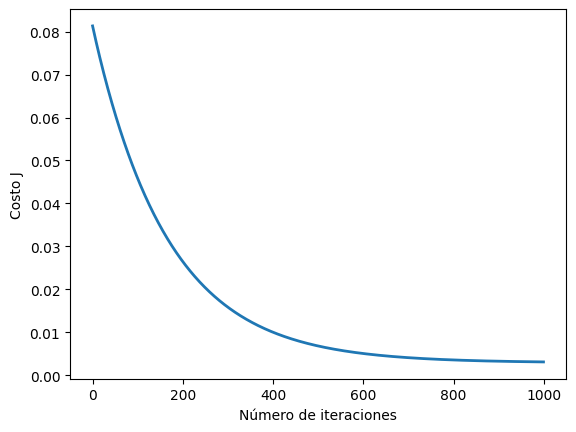

In [404]:
alpha = 0.003
num_iters = 1000

theta1 = np.zeros(X1_trTot.shape[1])

theta1, J_history = gradientDescentMulti(X1_trTot, Y1_tr, theta1, alpha, num_iters)

print('theta calculado sin regularizacion: {:s}'.format(str(theta1)))

pyplot.plot(np.arange(len(J_history)), J_history, lw=2)
pyplot.xlabel('Número de iteraciones')
pyplot.ylabel('Costo J')

Hacemos nuevamente el proceso de concatenar matrices para los valores del test

In [395]:
X1_ts = X1_test.values
Y1_ts = Y1_test.values
mts = Y1_ts.size
print(X1_ts.shape)
print(Y1_ts.shape)

(22129, 7)
(22129,)


Elevamos al cuadrado y multiplicamos los elementos para cada fila

In [396]:
X1_tstCuad=X1_ts**2

X1_tstComb = np.array([row_multiplications(row) for row in X1_ts])

Unimos las 3 matrices en una sola

In [397]:
X1_tstTot = np.concatenate([X1_ts, X1_tstCuad,X1_tstComb], axis=1)

Defino una nueva funcion de normalización que elimina los valores de sigma=0 esto para evitar la división entre 0

In [398]:
def featureNormalizeZ(X):
    X_norm = X.copy()
    mu = np.zeros(X.shape[1])
    sigma = np.zeros(X.shape[1])

    mu = np.mean(X, axis=0)
    sigma = np.std(X, axis=0)

    zero_std_indices = np.where(sigma == 0)[0]
    X_norm = np.delete(X_norm, zero_std_indices, axis=1)
    mu = np.delete(mu, zero_std_indices)
    sigma = np.delete(sigma, zero_std_indices)

    X_norm = (X_norm - mu) / sigma

    return X_norm, mu, sigma

Normalizamos la matriz del test

In [399]:
X_normTs, mu, sigma = featureNormalizeZ(X1_tstTot)

print(X1_tstTot)
print('Media calculada:', mu)
print('Desviación estandar calculada:', sigma)
print(X_normTs)

[[1.22934000e+06 2.40000000e-01 6.50000000e-01 ... 2.66800000e-01
  8.42769000e+08 6.68403000e+08]
 [1.42854000e+06 6.00000000e-01 6.50000000e-01 ... 3.13200000e-01
  8.49701160e+08 7.91101080e+08]
 [2.72412000e+06 5.30000000e-01 5.10000000e-01 ... 2.90000000e-01
  8.94787344e+08 7.71368400e+08]
 ...
 [7.63410000e+05 3.30000000e-01 6.20000000e-01 ... 2.68800000e-01
  7.98052696e+08 6.84045168e+08]
 [1.15050000e+05 5.00000000e-01 5.80000000e-01 ... 8.19000000e-02
  5.40615114e+08 2.91100446e+08]
 [9.99000000e+04 4.90000000e-01 5.70000000e-01 ... 1.35300000e-01
  5.67966276e+08 4.57143588e+08]]
Media calculada: [1.65391963e+06 4.70371913e-01 5.62343531e-01 5.85328754e-01
 5.21910163e-01 3.98158525e-01 1.47852478e+09 3.65050375e+12
 2.88859153e-01 3.20002024e-01 3.44349713e-01 2.88526002e-01
 1.74487817e-01 2.18932971e+18 7.96187924e+05 8.88917239e+05
 9.52431126e+05 9.24959647e+05 7.11462591e+05 2.50026436e+15
 2.62939954e-01 2.74460614e-01 2.47940564e-01 1.90346266e-01
 6.96550363e+08 3

Concatenamos el bias al test

In [400]:
X1_tstTot = np.concatenate([np.ones((mts, 1)), X_normTs], axis=1)
print(X1_ts.shape)

(22129, 7)


Hacemos las predicciones

In [401]:
PredicTP1 = np.dot(X1_tstTot, theta1)

Comparamos las predicciones con las Y predichas del test, se puede ver que son similares entre si

In [402]:
print(PredicTP1)
print(Y1_ts)

[0.37713333 0.35769837 0.36742323 ... 0.37072584 0.39444126 0.38817048]
[0.33 0.37 0.54 ... 0.32 0.39 0.22]
